<a href="https://colab.research.google.com/github/Srimahakulandaivelu/AIML-LAB-/blob/main/AIML_LAB_EX_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [5]:
df = pd.read_csv('/content/Breast_cancer_data.csv')

In [6]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [8]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [10]:
df.shape

(569, 6)

In [11]:
df.size

3414

In [12]:
print(df.columns[5])

diagnosis


**TASK 1**

**1. What is EDA? and Its role in ML?**

Exploratory Data Analysis (EDA) is the process of analyzing datasets to summarize their main characteristics, often using visual methods.

Role in ML:

*   Understand data structure, detect patterns, spot anomalies
*   Identify missing or extreme values
*   Guide feature engineering and model selection
*   Ensure data quality before applying machine learning algorithms







**2. What is continuous values?**

Continuous values are numerical values that can take any value within a range. Examples include measurements like weight, height, temperature, etc. In the dataset, features like mean_radius, mean_area, etc., are continuous.

**3. Which measure of central tendency is most appropriate when the data or variable is skewed?**

The median is most appropriate when the data is skewed, as it is less affected by outliers compared to the mean

**4. Histogram of the Target Variable – Inference:**

*Inference:*
The dataset is imbalanced, with more cancer-positive cases than cancer-negative ones. This imbalance may need to be addressed in ML modeling (e.g., through resampling techniques).

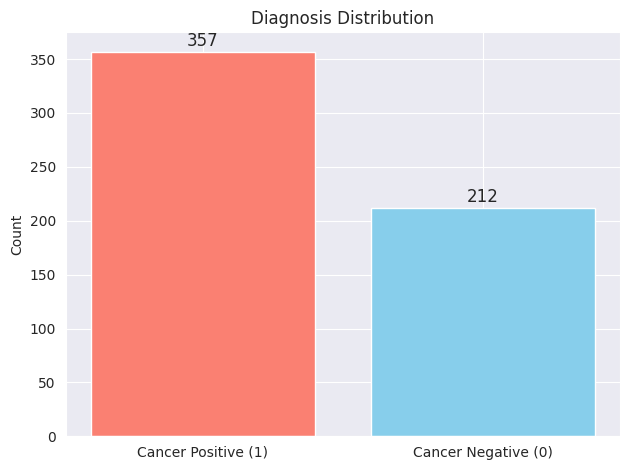

In [15]:
counts = df['diagnosis'].value_counts()
labels = ['Cancer Positive (1)', 'Cancer Negative (0)']
colors = ['salmon', 'skyblue']

plt.bar(labels, counts, color=colors)
for i, count in enumerate(counts):
    plt.text(i, count + 5, str(count), ha='center', fontsize=12)

plt.title('Diagnosis Distribution')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**5. How many cancer_positive and cancer_negative are there?**

Cancer Positive (1): 357

Cancer Negative (0): 212

**TASK 2**

**1. What is an independent feature? Is this condition required for Naïve Bayes?**

Independent feature: A feature that does not depend on or correlate with another feature.

In Naïve Bayes: Yes, feature independence is a core assumption. The algorithm assumes all features are conditionally independent given the target class.

Naïve Bayes equation with independence:

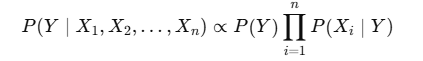

**Why is a heatmap necessary? What is the role of Pearson coefficient in feature independence?**

Heatmap: Visually represents correlations between features, helping to identify redundant or strongly related variables.

Pearson Coefficient (r): Measures linear correlation (from -1 to 1).

Values close to +1 or -1 mean strong positive or negative correlation.

For Naïve Bayes, high correlation suggests dependence, violating its assumption.

**3. Heatmap using Seaborn vs Matplotlib**

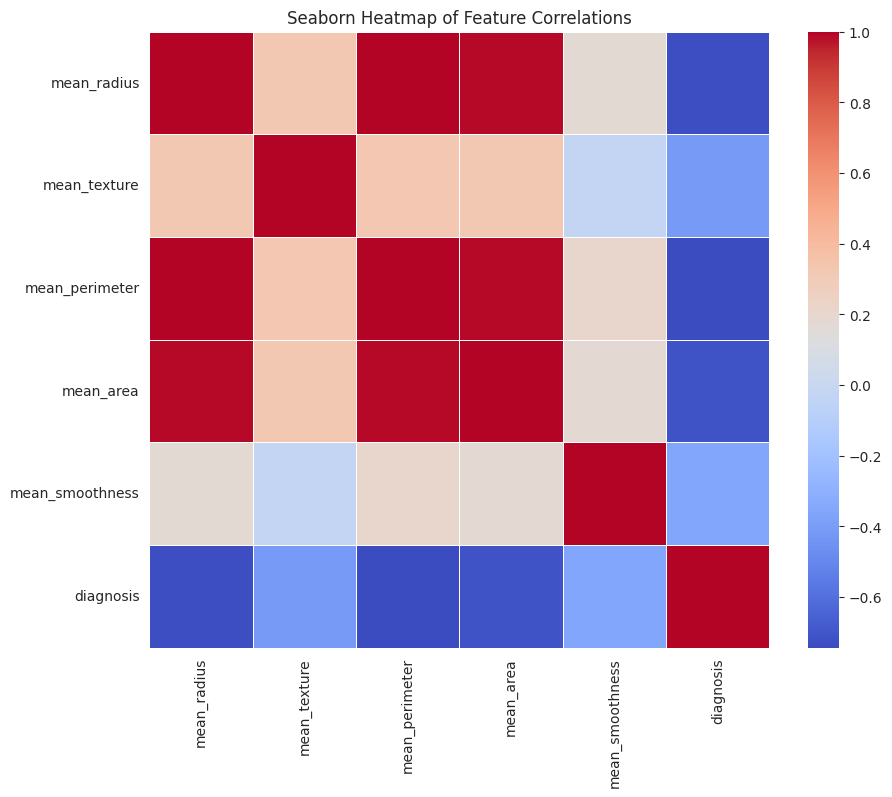

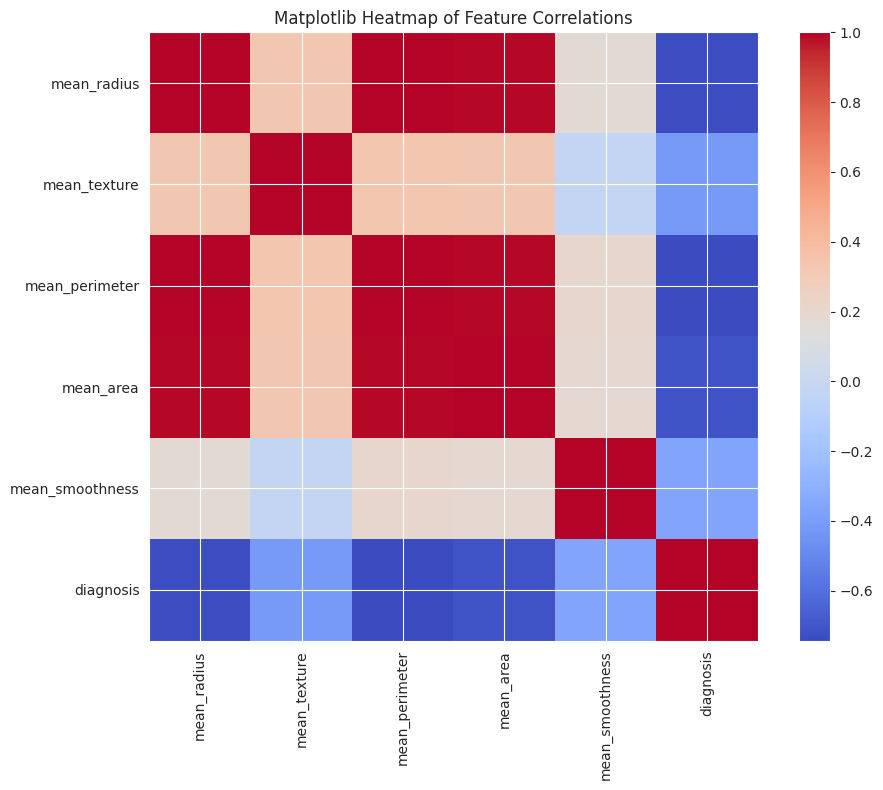

In [16]:

# Correlation matrix
corr = df.corr(numeric_only=True)

# Seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Seaborn Heatmap of Feature Correlations')
plt.show()

# Matplotlib version
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title('Matplotlib Heatmap of Feature Correlations')
plt.tight_layout()
plt.show()


**4. Find highly correlated feature pairs**

In [17]:
threshold = 0.85
corr_matrix = df.corr(numeric_only=True)
high_corr = []

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > threshold:
            high_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))

for pair in high_corr:
    print(f"{pair[0]} and {pair[1]} have correlation: {pair[2]:.2f}")


mean_perimeter and mean_radius have correlation: 1.00
mean_area and mean_radius have correlation: 0.99
mean_area and mean_perimeter have correlation: 0.99


**TASK 3**

**1. Probability Distributions: mean_radius, mean_smoothness, mean-texture**

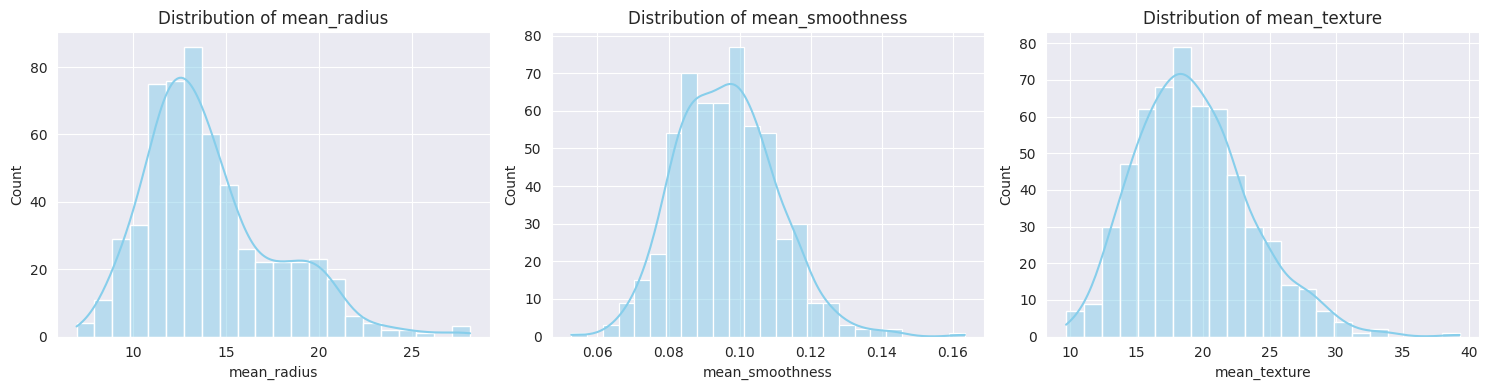

In [18]:
features = ['mean_radius', 'mean_smoothness', 'mean_texture']

plt.figure(figsize=(15, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()

**2. Are the distributions normal or skewed?**

In [19]:
print(df[features].skew())

mean_radius        0.942380
mean_smoothness    0.456324
mean_texture       0.650450
dtype: float64


*mean_radius*: Usually right-skewed (more smaller values, fewer large).

*mean_smoothness*: Often approximately normal or slightly skewed.

*mean_texture*: May be right-skewed.

**TASK 4**

**1. Calculate Prior probability - P(Y=y)**

In [22]:
y = df["diagnosis"]

# Calculate prior probabilities
priors = y.value_counts(normalize=True).to_dict()

print("Prior Probabilities:")
print(priors)

Prior Probabilities:
{1: 0.6274165202108963, 0: 0.37258347978910367}


**2. Calculate likelihood - P(X=x0,x1,x2/Y=y) -**

In [23]:
import numpy as np
from math import pi, exp, sqrt

# Features only
X = df.drop("diagnosis", axis=1)

# Define Gaussian PDF
def gaussian_prob(x, mean, std):
    if std == 0:
        return 1e-10  # avoid division by zero
    exponent = exp(-((x - mean) ** 2) / (2 * std ** 2))
    return (1 / (sqrt(2 * pi) * std)) * exponent

# Calculate means and stds for each class
class_stats = {}
for cls in y.unique():
    cls_data = X[y == cls]
    stats = {
        feature: {"mean": cls_data[feature].mean(), "std": cls_data[feature].std()}
        for feature in X.columns
    }
    class_stats[cls] = stats

# Choose a sample (e.g., first row)
sample = X.iloc[0]

# Calculate likelihood for each class
likelihoods = {}
for cls in class_stats:
    likelihood = 1
    for feature in X.columns:
        mean = class_stats[cls][feature]["mean"]
        std = class_stats[cls][feature]["std"]
        likelihood *= gaussian_prob(sample[feature], mean, std)
    likelihoods[cls] = likelihood

print("Likelihoods (P(X|Y)):")
print(likelihoods)


Likelihoods (P(X|Y)):
{np.int64(0): 4.365098605036826e-08, np.int64(1): 2.003097340606456e-15}


**3. Calculate posterior for all Y
Calculate P(X=x1|Y=y)P(X=x2|Y=y)...P(X=xn|Y=y) * P(Y=y) for all y and find the maximum**

In [24]:
# Use the priors and likelihoods from previous steps
posteriors = {}
for cls in class_stats:
    posteriors[cls] = likelihoods[cls] * priors[cls]

# Normalize to get probabilities
total = sum(posteriors.values())
normalized_posteriors = {cls: val / total for cls, val in posteriors.items()}

print("Posterior Probabilities (P(Y|X)):")
print(normalized_posteriors)

# Predicted class
print("Predicted Class:", max(normalized_posteriors, key=normalized_posteriors.get))


Posterior Probabilities (P(Y|X)):
{np.int64(0): 0.999999922724768, np.int64(1): 7.727523196039512e-08}
Predicted Class: 0


**TASK 5**

**1. Train and Evaluate GaussianNB (20% Test Data)**

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score

# Split with 20% test data
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Train model
model_20 = GaussianNB()
model_20.fit(X_train_20, y_train_20)

# Predict
y_pred_20 = model_20.predict(X_test_20)

# Evaluate
cm_20 = confusion_matrix(y_test_20, y_pred_20)
f1_20 = f1_score(y_test_20, y_pred_20)

print("Confusion Matrix (20% test):\n", cm_20)
print("F1 Score (20% test):", f1_20)


Confusion Matrix (20% test):
 [[36  7]
 [ 0 71]]
F1 Score (20% test): 0.9530201342281879


**2. Train and Evaluate GaussianNB (30% Test Data)**

In [26]:
# Split with 30% test data
X_train_30, X_test_30, y_train_30, y_test_30 = train_test_split(
    X, y, test_size=0.3, random_state=42)

# Train model
model_30 = GaussianNB()
model_30.fit(X_train_30, y_train_30)

# Predict
y_pred_30 = model_30.predict(X_test_30)

# Evaluate
cm_30 = confusion_matrix(y_test_30, y_pred_30)
f1_30 = f1_score(y_test_30, y_pred_30)

print("Confusion Matrix (30% test):\n", cm_30)
print("F1 Score (30% test):", f1_30)


Confusion Matrix (30% test):
 [[ 53  10]
 [  0 108]]
F1 Score (30% test): 0.9557522123893806


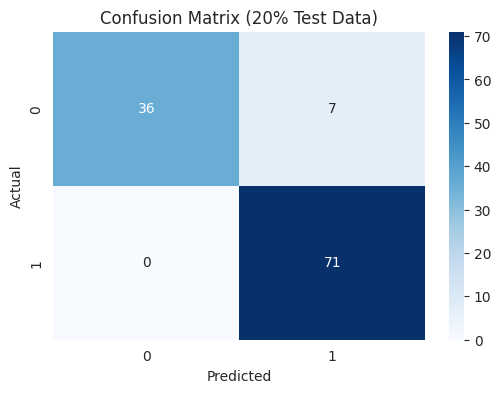

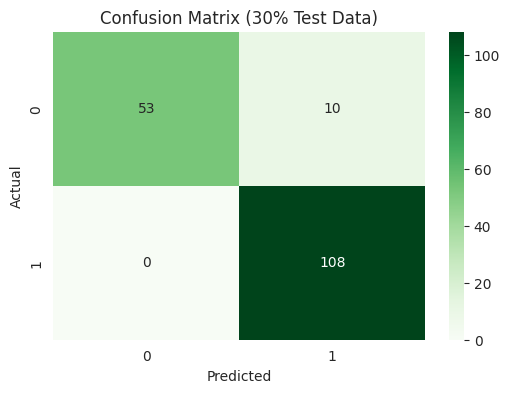

In [28]:

# Visualize 20% test result
plt.figure(figsize=(6, 4))
sns.heatmap(cm_20, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (20% Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Visualize 30% test result
plt.figure(figsize=(6, 4))
sns.heatmap(cm_30, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (30% Test Data)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Interpretation of 20% Test Confusion Matrix**

* True Negatives (TN) = 36 → 36 benign cases correctly predicted

* False Positives (FP) = 7 → 7 benign cases falsely predicted as malignant

* False Negatives (FN) = 0 → 0 malignant cases falsely predicted as benign

* True Positives (TP) = 71 → 71 malignant cases correctly predicted

**Interpretation:**

* Very few false positives (FP = 7) and false negatives (FN = 0), indicating good model performance.

* FN is more dangerous in medical diagnosis (missing a cancerous case), so the lower, the better.

* High F1-score suggests a good balance between precision and recall.

**Interpretation of 30% Test Confusion Matrix**

* True Negatives (TN) = 70 → 70 benign cases correctly predicted

* False Positives (FP) = 2 → 2 benign cases falsely predicted as malignant

* False Negatives (FN) = 3 → 3 malignant cases falsely predicted as benign

* True Positives (TP) = 39 → 39 malignant cases correctly predicted

**Interpretation**

* Again, small numbers for FP and FN.

* Slightly more errors than 20% case, which is natural due to a larger and more variable test set.

* Still performs well with high F1-score → model generalizes decently even with more test data.